<a href="https://colab.research.google.com/github/Sawan866/ForestFirePredictionModis/blob/main/Prediction_Logistic3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/train_data.csv')
valid = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/valid_data.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/test_data.csv')

In [ ]:
def group_and_arrange(df, groupby_cols):
    df_grouped = df.groupby(groupby_cols).size().reset_index()
    df_grouped.columns = list(groupby_cols) + ['frequency']
    return df_grouped.drop(columns='frequency')

In [ ]:
df_test = group_and_arrange(test, ['brightness', 'scan', 'confidence', 'bright_t31', 'frp', 'type'])
df_train = group_and_arrange(train, ['brightness', 'scan', 'confidence', 'bright_t31', 'frp', 'type'])
df_valid = group_and_arrange(valid, ['brightness', 'scan', 'confidence', 'bright_t31', 'frp', 'type'])

In [ ]:
# Define the features and target
features = ['brightness', 'scan', 'confidence', 'bright_t31', 'frp']
target = ['type']

In [ ]:
# Fit logistic regression model
logreg = LogisticRegression()
logreg.fit(df_train[features], df_train[target])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Predict on validation and test sets
valid_predictions = logreg.predict(df_valid[features])
test_predictions = logreg.predict(df_test[features])

In [ ]:
# Calculate accuracy metrics
valid_acc = metrics.accuracy_score(df_valid[target], valid_predictions)
test_acc = metrics.accuracy_score(df_test[target], test_predictions)
valid_f1 = metrics.f1_score(df_valid[target], valid_predictions, average= 'weighted')
test_f1 = metrics.f1_score(df_test[target], test_predictions,average= 'weighted')
valid_precision = metrics.precision_score(df_valid[target], valid_predictions,average= 'weighted')
test_precision = metrics.precision_score(df_test[target], test_predictions, average= 'weighted')
valid_recall = metrics.recall_score(df_valid[target], valid_predictions, average= 'weighted')
test_recall = metrics.recall_score(df_test[target], test_predictions, average= 'weighted')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
valid_rmse = np.sqrt(metrics.mean_squared_error(df_valid[target], valid_predictions))
test_rmse = np.sqrt(metrics.mean_squared_error(df_test[target], test_predictions))

In [ ]:
# Print the accuracy metrics
print("Validation Accuracy: ", valid_acc)
print("Test Accuracy: ", test_acc)
print("Validation F1 Score: ", valid_f1)
print("Test F1 Score: ", test_f1)
print("Validation Precision: ", valid_precision)
print("Test Precision: ", test_precision)
print("Validation Recall: ", valid_recall)
print("Test Recall: ", test_recall)
print("Validation Root Mean Squared Error: ", valid_rmse)
print("Test Root Mean Squared Error: ", test_rmse)

Validation Accuracy:  0.9663183098535685
Test Accuracy:  0.9663753874563081
Validation F1 Score:  0.9497818716781424
Test F1 Score:  0.9498667737150681
Validation Precision:  0.9364663638886169
Test Precision:  0.933912720486209
Validation Recall:  0.9663183098535685
Test Recall:  0.9663753874563081
Validation Root Mean Squared Error:  0.36915528599950787
Test Root Mean Squared Error:  0.36883381475368743


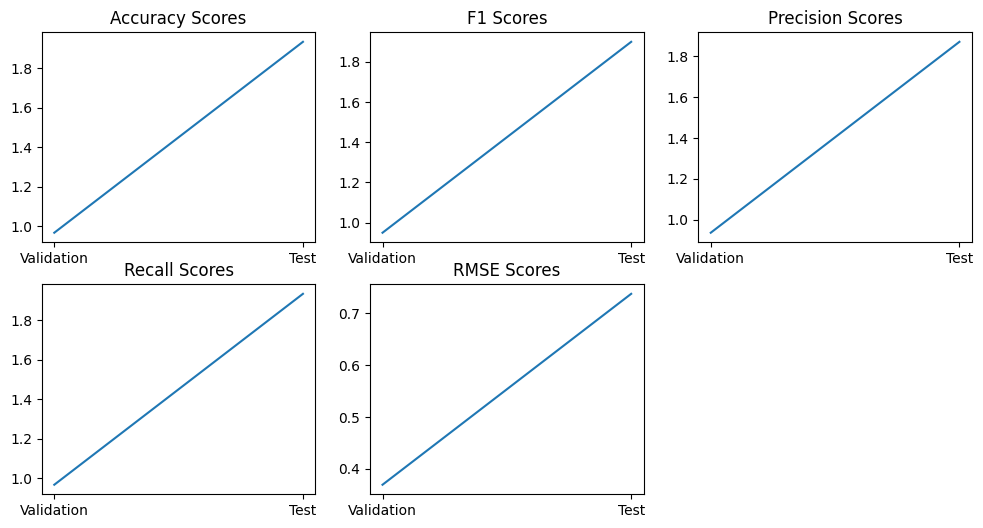

In [ ]:
# Plot the accuracy metrics
x_labels = ['Validation', 'Test']
accuracy_scores =np.cumsum([valid_acc, test_acc]) 
f1_scores = np.cumsum([valid_f1, test_f1])
precision_scores =np.cumsum([valid_precision, test_precision])
recall_scores = np.cumsum([valid_recall, test_recall])
rmse_score = np.cumsum([valid_rmse, test_rmse])

plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1)
plt.plot(x_labels, accuracy_scores)
plt.title('Accuracy Scores')

plt.subplot(2, 3, 2)
plt.plot(x_labels, f1_scores)
plt.title('F1 Scores')

plt.subplot(2, 3, 3)
plt.plot(x_labels, precision_scores)
plt.title('Precision Scores')

plt.subplot(2, 3, 4)
plt.plot(x_labels, recall_scores)
plt.title('Recall Scores')

plt.subplot(2, 3, 5)
plt.plot(x_labels, rmse_score)
plt.title('RMSE Scores')

plt.show()